In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import sys
sys.path.insert(0,'../')
import Spectrogram
import torch
from scipy import fft
from librosa import filters

# Real Part

(-25.55, 536.55, -1.0881425388145967, 0.8509933151065279)

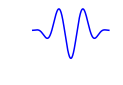

In [3]:
n_fft = 512
fs = 500
k=3
s = np.arange(0,n_fft, 1)
wcos = np.cos(2*k*np.pi*s/n_fft)*get_window('hann', n_fft)


plt.figure(figsize=(1.5,1))
plt.plot(wcos, 'b')
plt.axis('off')

# Imag Part

(-25.55, 536.55, -1.0973515996697083, 1.0973515996697083)

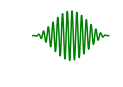

In [4]:
n_fft = 512
fs = 500
k=16
s = np.arange(0,n_fft, 1)
wcos = np.sin(2*k*np.pi*s/n_fft)*get_window('hann', n_fft)


plt.figure(figsize=(1.5,1))
plt.plot(wcos, 'g')
plt.axis('off')

In [5]:
27.5*2**8

7040.0

16


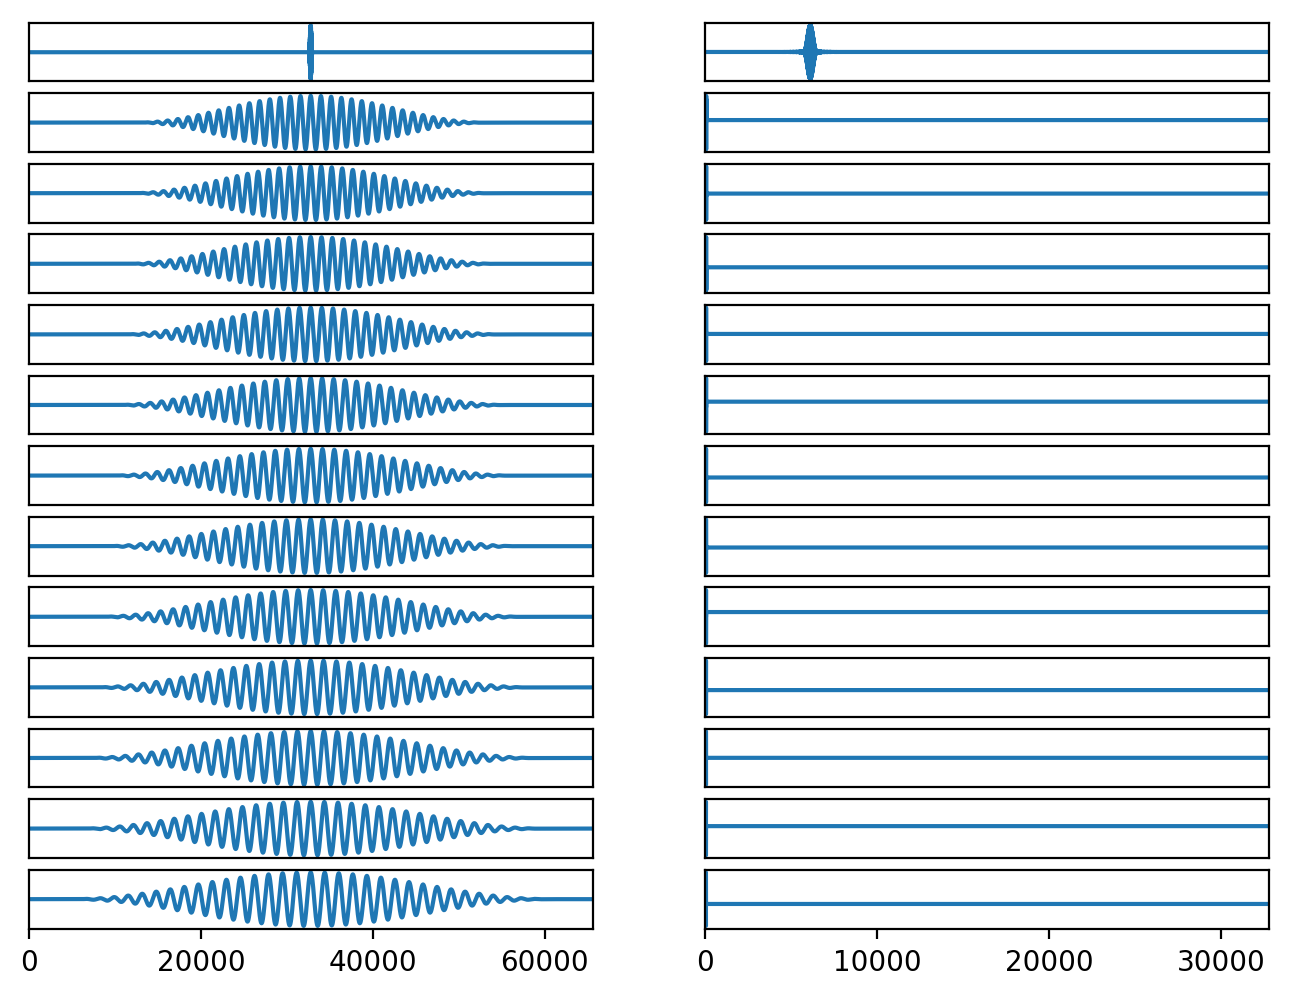

In [6]:
fs =44100
s = np.linspace(0,10,fs*10)
fmin = 27
fmax = 4190
bins = 24

def nextpow2(A):
    return int(np.ceil(np.log2(A)))

def create_cqt_kernals(fmin, fmax, bins, fs, window):
    Q = 1/(2**(1/bins)-1)
    K = np.ceil(bins * np.log2(fmax / fmin)) # Calculate the number of bins
    fftLen = 2**nextpow2(np.ceil(Q * fs / fmin))
    print(nextpow2(np.ceil(Q * fs / fmin)))
    minWin = 2**nextpow2(np.ceil(Q * fs / fmax))
    tempKernel = np.zeros((int(K), int(fftLen)), dtype=np.complex64)
    specKernel = np.zeros((int(K), int(fftLen)), dtype=np.complex64)
    freqs = fmin * 2.0 ** (np.r_[0:K] / np.float(bins))
    for k in range(0, int(K)):
        freq = freqs[k]
        l = np.ceil(Q * fs / freq)
        if l%2==1: # pad more zeros on RHS
            start = int(np.ceil(fftLen / 2.0 - l / 2.0))-1

        else:
            start = int(np.ceil(fftLen / 2.0 - l / 2.0))
        tempKernel[k, start:start + int(l)] = get_window(window,int(l), fftbins=True)*np.exp(np.r_[-l//2:l//2]*1j*2*np.pi*freq/fs)/l
        # specKernel[k, :]=fft(conj(tempKernel[k, :]))
        specKernel[k, :] = fft(tempKernel[k])
    return specKernel[:,:fftLen//2+1], fftLen, tempKernel

cqt_filter, kernal_width, tempKernel = create_cqt_kernals(fmin, fmax, bins, fs, 'hann')
cqt_filter_real = torch.tensor(cqt_filter.real)
cqt_filter_imag = torch.tensor(cqt_filter.imag)

fig, ax = plt.subplots(13, 2, figsize=(8,6), dpi=200)
max_bin = tempKernel.shape[0]
for idx,i in enumerate(tempKernel):
    counter = idx
    idx = -(idx+1)
    if counter < 12:
        ax[idx,0].plot(i.real)
        ax[idx,1].plot(cqt_filter.real[counter])
        ax[idx,0].set_xlim(0,kernal_width)
        ax[idx,1].set_xlim(0,kernal_width//2+1)
        if idx == -1:
            ax[idx,0].set_yticks([])
            ax[idx,1].set_yticks([])
        else:
            ax[idx,0].set_xticks([])
            ax[idx,0].set_yticks([])
            ax[idx,1].set_xticks([])
            ax[idx,1].set_yticks([])
    elif counter == max_bin-1:
        ax[0,0].plot(i.real)
        ax[0,0].set_xlim(0,kernal_width)      
        ax[0,0].set_xticks([])
        ax[0,0].set_yticks([])
        ax[0,1].plot(cqt_filter.real[counter])
        ax[0,1].set_xlim(0,kernal_width//2+1)      
        ax[0,1].set_xticks([])
        ax[0,1].set_yticks([])
    else:
        pass

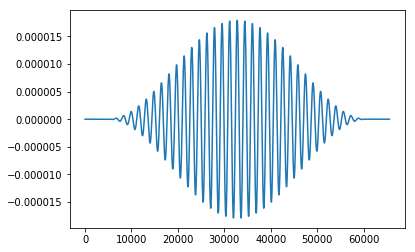

In [8]:
plt.plot(tempKernel[0])

In [142]:
cqt_filter.shape

(175, 32769)

(-3276.75, 68811.75, -0.0029428255395032464, 0.0029946301248855887)

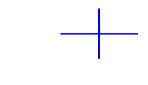

In [25]:
k=-1
plt.figure(figsize=(1.5,1))
plt.plot(tempKernel[k].real, 'b')
plt.axis('off')

(-3276.75, 68811.75, -0.0029804340098053216, 0.0029836172703653573)

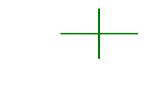

In [26]:
plt.figure(figsize=(1.5,1))
plt.plot(tempKernel[k].imag, 'g')
plt.axis('off')

(-25.6, 537.6, -0.46988239586353303, 0.5431030660867691)

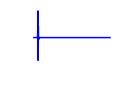

In [120]:
n_fft = 512
fs = 500
k=0


plt.figure(figsize=(1.5,1))
plt.plot(cqt_filter[k].real, 'b')
plt.axis('off')

(-25.6, 537.6, -0.021929477248340844, 0.0219347876496613)

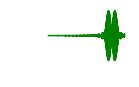

In [117]:
n_fft = 512
fs = 500
k=-1


plt.figure(figsize=(1.5,1))
plt.plot(cqt_filter[k].imag, 'g')
plt.axis('off')